# For 循环示意图

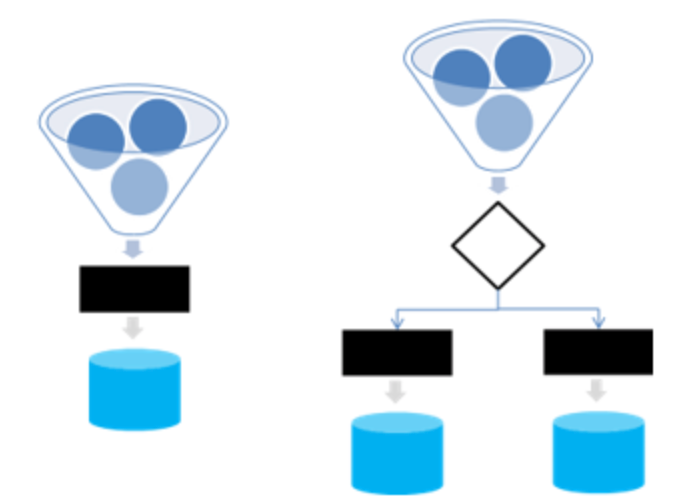

for循环的三个核心内容分别：
- 为容器对象（即Python中的基础数据结构，如字符串、列表、元组和字典等）、
- 容器内的元素
- 循环体。
> 上图中，左右两个示意图的唯一区别在于，for循环的循环体是否包含if分支判断。

## 案例一、多文件合并

In [1]:
# 导入第三方模块
import pandas as pd  # 用于读取数据
import os   # 用于返回目录内的文件名称

# 指定待读取数据所在的目录
path = r'./date_of_for/datas'
# 构造空列表datas，用于存储所有文件的数据
datas = []
for filename in os.listdir(path):
    # 判断文件类型是否为txt格式
    if filename.find('txt') != -1:
        # 读取txt格式的数据
        data = pd.read_csv(path + '/' + filename, sep = '\t')
    else:
        # 读取csv格式的数据
        data = pd.read_csv(path + '/' + filename)
    # 将读取的每一个数据集存储到datas列表中
    datas.append(data)

# 将所有数据文件做合并
final_data = pd.concat(datas)
final_data

,Uid,Order_Date,Order_Id,Pay_Type,Pay_Amt,Is_Discount
0,6116118,2018/6/10 4:14,2996034878,9,448.037051,0
1,3515115,2018/6/8 8:20,8422112276,2,828.999149,0
2,5219114,2018/6/3 19:46,2327498175,3,398.998214,1
3,4920116,2018/6/21 10:08,3377190370,7,848.383891,0
4,3411118,2018/6/12 7:19,6036860003,4,840.144413,1
...,...,...,...,...,...,...
220,4220113,2018/4/21 10:42,6126199398,8,817.185966,1
221,5314114,2018/4/15 5:14,3159183908,7,470.927495,0
222,6516113,2018/4/15 18:46,2386768282,12,81.006309,0
223,3320111,2018/4/16 9:07,6541272407,5,1047.737626,1


## 案例二、数据单位的统一

APP的文件大小有KB单位也有MB单位。很显然，单位不一致的数据肯定是不能直接用来分析和建模的。所以，该如何借助于for循环的手段将数据做一致性的清洗呢？

In [2]:
# 读取数据
apps = pd.read_excel('./date_of_for/apps.xlsx')

# 处理安装量字段install，将数据统一为“万”的单位
install_new = []
for i in apps['install']:
    # 判断安装量是否已“亿”为单位
    if i.find('亿') != -1:
        install_new.append(str(float(i[:-1])*10000) + '万')
        # 判断安装量是否已“万”为单位
    elif i.find('万') != -1:
        install_new.append(i)
    else:
        install_new.append(str(int(i)/10000) + '万')

# 将install_new转换为序列对象，并替换数据集apps内原始字段install的值
apps['install'] = pd.Series(install_new)

# 处理软件大小size，将数据统一为“MB”的单位
size_new = []
for i in apps['size']:
# 判断软件大小是否已“KB”为单位
    if i.find('KB') != -1:
        size_new.append(str(round(float(i[:-2])/1024,2)) + 'MB')
    else:
        size_new.append(i)

# 将size_new转换为序列对象，并替换数据集apps内原始字段size的值
apps['size'] = pd.Series(size_new)        

# 查看数据转换后的前10行
apps.head(10)

,appname,comments,company,install,love,size
0,拼多多,1921,上海寻梦信息技术有限公司,3841.9万,95.00%,13.35MB
1,同城快递,0,湖南潋宇信息技术有限公司,0.915万,暂无,0.96MB
2,寺库奢侈品,1964,北京寺库商贸有限公司,175.4万,100.00%,17.21MB
3,淘宝,14244,淘宝（中国）软件有限公司,46000.0万,68.00%,73.78MB
4,国美,271,国美在线电子商务有限公司,1123.1万,61.00%,59.44MB
5,阿里巴巴(alibaba)1688批发采购带直播的购物软件,419,阿里巴巴（中国）网络技术有限公司,4560.8万,50.00%,31.45MB
6,康爱多掌上药店,308,广东康爱多连锁药店有限公司,111万,97.00%,10.87MB
7,蘑菇特卖街,0,NaN,6.2万,暂无,0.93MB
8,京东,677,北京京东叁佰陆拾度电子商务有限公司,18000.0万,53.00%,69.09MB
9,每日优鲜,1297,北京每日优鲜电子商务有限公司,204.7万,89.00%,15.16MB


## 随机插入特数值

In [51]:
df = pd.DataFrame(np.random.randint(-3,6,(50,50)),)

In [40]:
for i in range(10):
    df.iloc[np.random.randint(0,df.shape[0]),np.random.randint(0,df.shape[1])]=np.inf
    df.iloc[np.random.randint(0,df.shape[0]),np.random.randint(0,df.shape[1])]=np.nan

df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,5,-1,5,4,3.0,0,4,3,-3.0,-1,...,1.0,2,2.0,-3,-1.0,-1.0,0,3,-1.0,1
1,4,3,-3,2,5.0,2,-1,5,inf,-1,...,0.0,1,inf,-1,1.0,3.0,1,-2,3.0,-1
2,3,1,4,5,5.0,0,4,-1,-1.0,5,...,0.0,0,2.0,4,0.0,0.0,0,3,2.0,4
3,3,2,1,3,0.0,-2,-2,2,2.0,2,...,5.0,2,5.0,0,1.0,1.0,-1,2,3.0,0
4,5,0,-3,2,4.0,4,3,3,5.0,5,...,1.0,-2,-2.0,0,3.0,-3.0,-2,5,2.0,1
5,-1,1,-2,5,1.0,0,0,2,0.0,5,...,-2.0,2,2.0,1,2.0,-3.0,1,0,-2.0,-1
6,4,1,-1,-3,-2.0,-2,3,3,3.0,-1,...,2.0,3,-3.0,3,5.0,2.0,-2,0,-3.0,-2
7,4,-2,4,2,1.0,-3,4,-1,5.0,2,...,-1.0,-1,0.0,-1,-1.0,3.0,-3,4,-3.0,-2
8,-2,-2,2,2,0.0,-1,-3,-3,-1.0,4,...,5.0,2,-1.0,5,5.0,NaN,0,3,1.0,-2
9,1,4,-2,3,-3.0,0,-2,2,0.0,5,...,4.0,1,0.0,1,2.0,2.0,-2,-2,3.0,-1
